In [ ]:
import pandas as pd
import matplotlib.pyplot as plts
import seaborn as sns

"""
A) Faça a importação para o R do arquivo do ENADE 2017 Utilizado em nosso curso (MICRODADOS ENADE 2017.txt)  (Valor: 0,5 Pontos)
"""

In [ ]:
data = pd.read_csv(r'MICRODADOS_ENADE_2017.txt', sep=';', encoding='latin1', low_memory=False)
data.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"""
B) Faça um filtro escolhendo as seguintes variáveis e as classifique quanto ao tipo de variável (EX: Qualitativa nominal, Quantitativa contínua...):
NT_OBJ_FG, CO_GRUPO, CO_REGIAO_CURSO, QE_I02, CO_TURNO_GRADUACAO (Valor 0,5 Pontos)
"""

NT_OBJ_FG -> Quantitativa Continua

CO_GRUPO -> Qualitativa Nominal

CO_REGIAO_CURSO -> Qualitativa Nominal

QE_I02 -> Qualitativa Nominal

CO_TURNO_GRADUACAO -> Qualitativa Nominal


In [ ]:
data_filtered = data.loc[:, ['NT_OBJ_FG', 'CO_GRUPO', 'CO_REGIAO_CURSO', 'QE_I02', 'CO_TURNO_GRADUACAO']]
data_filtered.head()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,QE_I02,CO_TURNO_GRADUACAO
0,"87,5",5710,5,A,3.0
1,"87,5",5710,5,D,3.0
2,"87,5",5710,5,D,3.0
3,"75,0",5710,5,A,3.0
4,"75,0",5710,5,A,3.0


"""
C) Escolha um curso do Enade (Não pode ser análise e desenvolvimento de sistemas (ADS) ) e
filtre só esse curso para a nossa análise: (Valor 0,5 Pontos)
Variável área de enquadramento do curso no Enade: co_grupo
"""

In [ ]:
print(data_filtered.dtypes)

data_filtered = data_filtered[data_filtered['CO_GRUPO'] == 701]
data_filtered.head()

NT_OBJ_FG              object
CO_GRUPO                int64
CO_REGIAO_CURSO         int64
QE_I02                 object
CO_TURNO_GRADUACAO    float64
dtype: object


,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,QE_I02,CO_TURNO_GRADUACAO
2065,"37,5",701,2,D,2.0
2066,"62,5",701,2,A,2.0
2067,"62,5",701,2,A,2.0
2068,NaN,701,2,A,2.0
2069,"75,0",701,2,NaN,2.0


D) Transforme as variáveis colocando os seus devidos rótulos, para que facilite a análise descritiva: (Valor 0,5 Pontos)

Exemplo: Estado civil "A", vai virar "Solteiro"

In [ ]:
data_filtered = data_filtered.dropna()

data_filtered['NT_OBJ_FG'] = data_filtered['NT_OBJ_FG'].str.replace(',', '.')
data_filtered['NT_OBJ_FG'] = data_filtered['NT_OBJ_FG'].astype(float)
data_filtered = data_filtered[data_filtered['NT_OBJ_FG'] >= 0]
data_filtered = data_filtered[data_filtered['NT_OBJ_FG'] <= 100]

data_filtered['CO_REGIAO_CURSO'] = data_filtered['CO_REGIAO_CURSO'].astype(str)
data_filtered['QE_I02'] = data_filtered['QE_I02'].astype(str)
data_filtered['CO_TURNO_GRADUACAO'] = data_filtered['CO_TURNO_GRADUACAO'].astype(str)

data_filtered['CO_GRUPO'] = "Matemática (Bacharelado)"
data_filtered['CO_REGIAO_CURSO'] = data_filtered['CO_REGIAO_CURSO'].replace({'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'})
data_filtered['QE_I02'] = data_filtered['QE_I02'].replace({'A': 'Branca', 'B': 'Preta', 'C': 'Amarela', 'D': 'Parda', 'E': 'Indígena', 'F': 'Não quero declarar'})
data_filtered['CO_TURNO_GRADUACAO'] = data_filtered['CO_TURNO_GRADUACAO'].replace({'1.0': 'Matutino', '2.0': 'Vespertino', '3.0': 'Integral', '4.0': 'Noturno'})

data_filtered.head()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,QE_I02,CO_TURNO_GRADUACAO
2065,37.5,Matemática (Bacharelado),Nordeste,Parda,Vespertino
2066,62.5,Matemática (Bacharelado),Nordeste,Branca,Vespertino
2067,62.5,Matemática (Bacharelado),Nordeste,Branca,Vespertino
2070,37.5,Matemática (Bacharelado),Nordeste,Parda,Vespertino
2072,62.5,Matemática (Bacharelado),Nordeste,Parda,Vespertino


E) Faça as estatísticas descritivas do seu banco (Resumo geral), avaliando se há variáveis faltantes ou não,
e se existirem, elimine-as. (Valor 0,5 Pontos)

In [ ]:
print(data_filtered.describe(include='object'))
print(data_filtered.describe())


                        CO_GRUPO CO_REGIAO_CURSO  QE_I02 CO_TURNO_GRADUACAO
count                        384             384     384                384
unique                         1               5       6                  4
top     Matemática (Bacharelado)         Sudeste  Branca           Integral
freq                         384             215     215                212
        NT_OBJ_FG
count  384.000000
mean    56.835938
std     23.908587
min      0.000000
25%     37.500000
50%     62.500000
75%     75.000000
max    100.000000


F) Escolha uma das variáveis ou ambas: Turnos (CO_TURNO_GRADUACAO) ou RAÇA ( QE_I02) e estude o comportamento das notas dos alunos,
faça o cruzamento de variáveis, elabore gráficos adequados para cada tipo de variável, se há razão para desconfiar que há uma diferença
significativa entre as categorias, de forma geral e entre regiões. (Valor 3,0 Pontos)
Exemplo: Há razão para desconfiar que pessoas brancas têm melhores notas que amarelos?
Exemplo: Há razão para desconfiar que pessoas que estudam no turno da manhã têm notas maiores que os que estudam à noite?
Exemplo: Há razão para desconfiar que pessoas pretas da região sul têm notas maiores que pessoas pretas da região norte?


/tmp/ipython-input-2683047752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


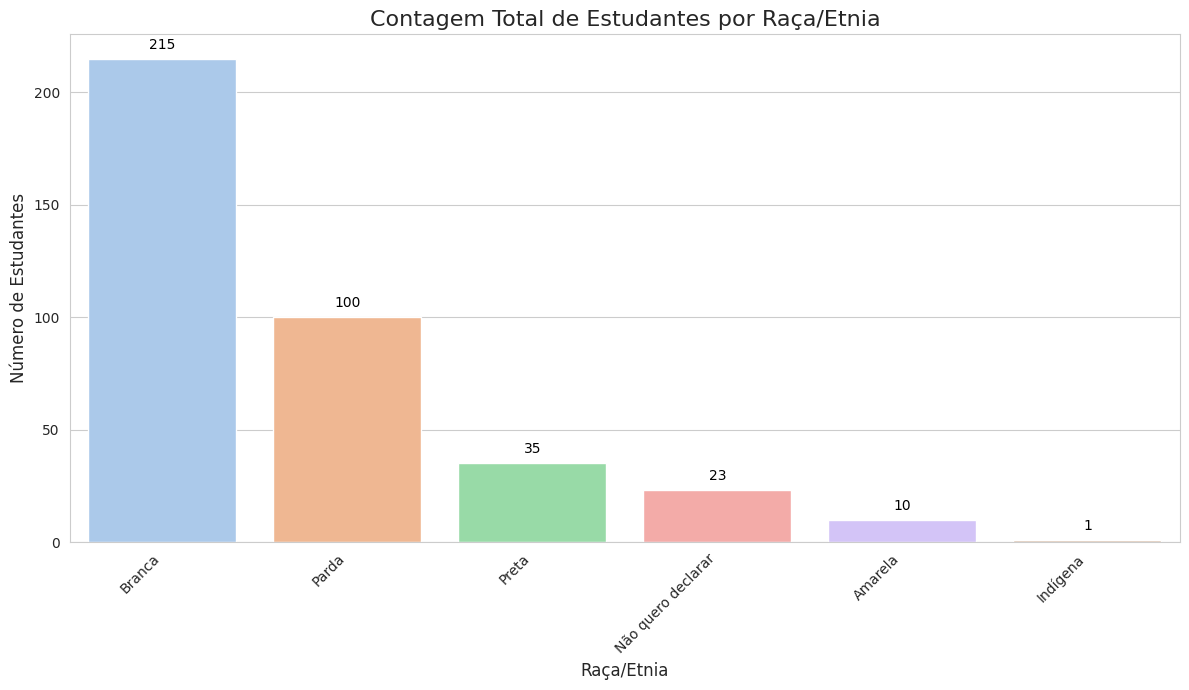

/tmp/ipython-input-2683047752.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


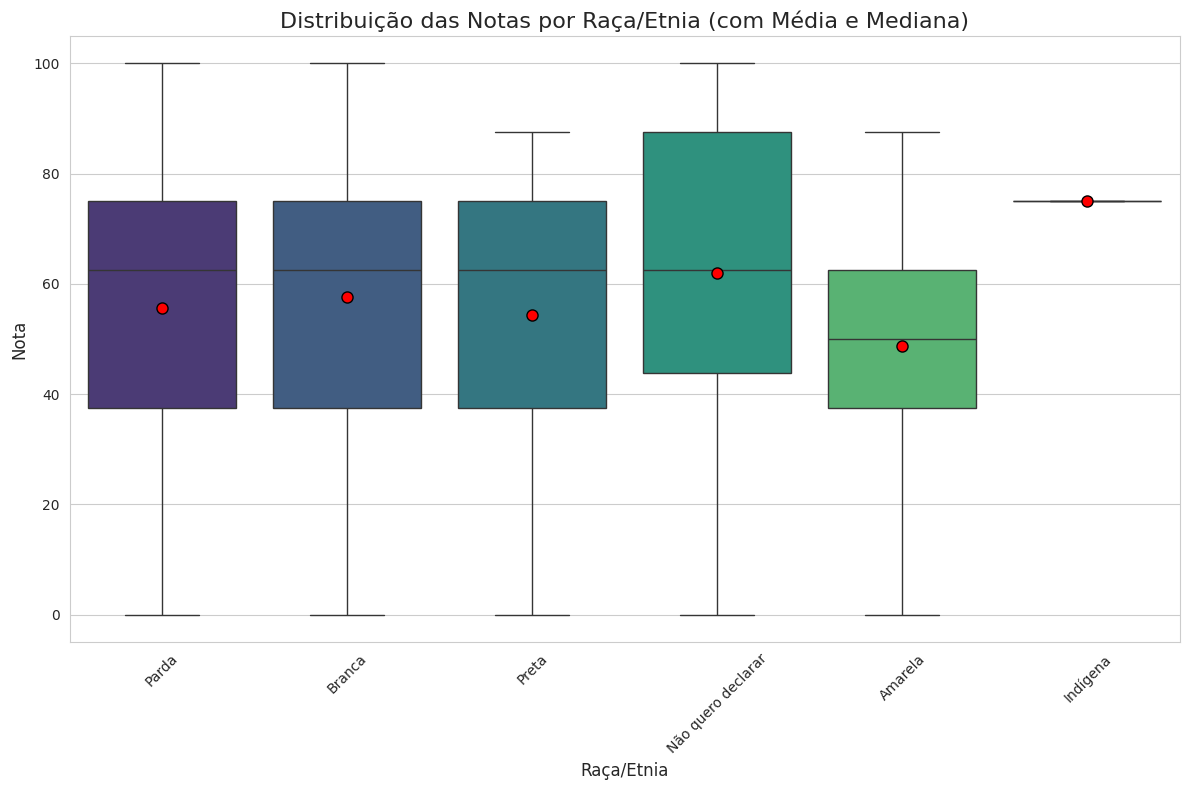

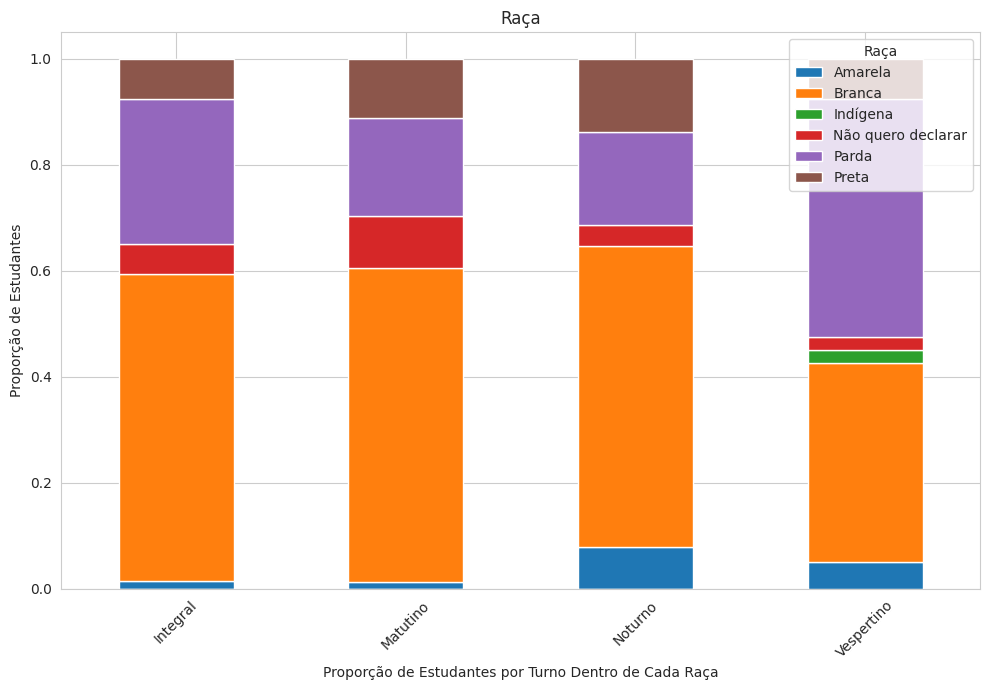

QE_I02
Branca                55.989583
Parda                 26.041667
Preta                  9.114583
Não quero declarar     5.989583
Amarela                2.604167
Indígena               0.260417
Name: proportion, dtype: float64


In [ ]:
# QE_I02
import seaborn as sns

sns.set_style("whitegrid")
plts.figure(figsize=(12, 7))
ax = sns.countplot(
    x='QE_I02',
    data=data_filtered,
    palette='pastel',
    order=data_filtered['QE_I02'].value_counts().index
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10,
        color='black'
    )

plts.title('Contagem Total de Estudantes por Raça/Etnia', fontsize=16)
plts.xlabel('Raça/Etnia', fontsize=12)
plts.ylabel('Número de Estudantes', fontsize=12)

plts.xticks(rotation=45, ha='right')
plts.tight_layout()
plts.show()

plts.figure(figsize=(12, 8))
sns.boxplot(
    x='QE_I02',
    y='NT_OBJ_FG',
    data=data_filtered,
    palette='viridis',
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "red",
        "markeredgecolor": "black",
        "markersize": "8"
    }
)

plts.title('Distribuição das Notas por Raça/Etnia (com Média e Mediana)', fontsize=16)
plts.xlabel('Raça/Etnia', fontsize=12)
plts.ylabel('Nota', fontsize=12)
plts.xticks(rotation=45)
plts.tight_layout()
plts.show()

print("============================================================================")
cross_tab = pd.crosstab(data_filtered['CO_TURNO_GRADUACAO'], data_filtered['QE_I02'])
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)
cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 7))
plts.title('Raça')
plts.xlabel('Proporção de Estudantes por Turno Dentro de Cada Raça')
plts.ylabel('Proporção de Estudantes')
plts.legend(title='Raça')
plts.xticks(rotation=45)
plts.tight_layout()
plts.show()
print("============================================================================")

# % de cada raça no curso

race_counts = data_filtered['QE_I02'].value_counts(normalize=True)
race_percentages = race_counts * 100
print(race_percentages)
print("============================================================================")




CONTAGEM TOTAL DE ESTUDANTES POR RAÇA/ETNIA

O curso de matemática é predominantemente composto por pessoas brancas e pardas, sendo um total de 82% do curso.

GRÁFICO DISTRIBUIÇÃO DAS NOTAS POR RAÇA/ ETNIA (COM MEDIA E MEDIANA)

As pessoas que "não se declaram" se destacam nas notas, pois 25% delas atingiram maiores notas comparados aos outros grupos. 50% atingiram notas superiores aos demais, ultrapassando 80 pontos de nota, e os outros 25% atingiram de 90 até a nota máxima. Além de possuir a maior média de notas.
Existe uma alta variabilidade dentro de cada grupo, pois há alunos com notas muito baixas e alunos com notas muito altas, conforme podemos ver nas retas fora do intervalo interquartílico.
  

GRÁFICO DE ESTUDANTE POR TURNO DENTRO DE CADA RAÇA

Os turnos integral, matutino e noturno, possuem uma maior proporção de pessoas brancas, seguidos de pessoas pardas. Já no turno vespertino a maior proporção há uma maior porporção de pessoas pardas, seguidas de brancas.

PROPORÇÃO DE ESTUDANTES POR RAÇA DENTRO DE CADA REGIÃO DO CURSO

Há uma relação região x etnia que é ordenada da seguinte forma (de etnia mais frequente para etnia menos frequente):

Centro-oeste:
  - branca
  - parda
  - preta
  - amarela
  - não quero declarar
  - indígena

Nordeste:
  - parda
  - branca
  - não quero declarar
  - preta
  - indígena
  - amarela

Norte:
  - parda
  - branca
  - preta
  - não quero declarar
  - indígena
  - amarela

Sudeste:
  - branca
  - parda
  - preta
  - não quero declarar
  - amarela
  - indígena

Sul
  - Branca
  - Não quero declarar
  - Parda
  - Amarela
  - Preta
  - Indígena


G) Elaborar um Dashboard usando streamlite para que alguém responsável por elaborar políticas públicas, fosse capaz de evidenciar insights na elaboração das mesmas  (0,5) (Pode ser publicado ou só com os códigos no streamlite) bonus extra

(0 - 4)
Aplicação do teorema central do limite (TCL) empiricamente
Não pode escolher a distribuição exponencial

Binomial
poisson
geométrica
uniforme contínua



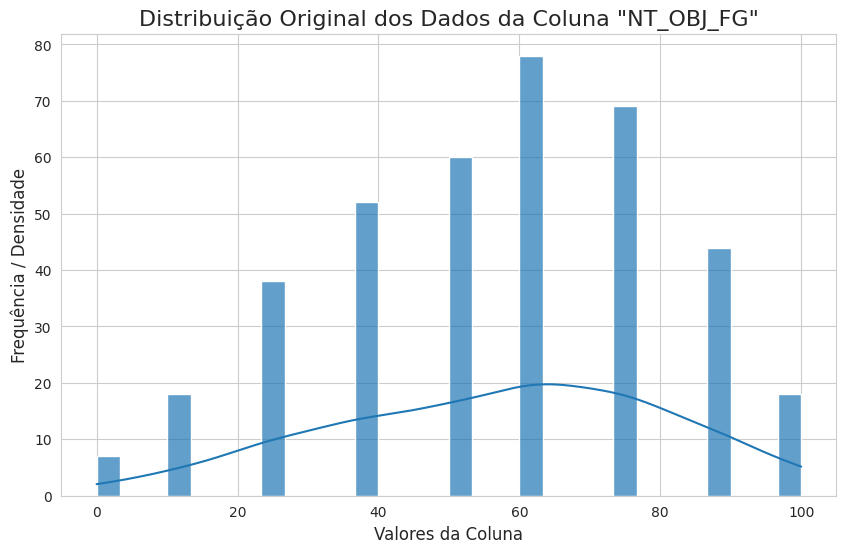

Tamanho da população considerada: 384


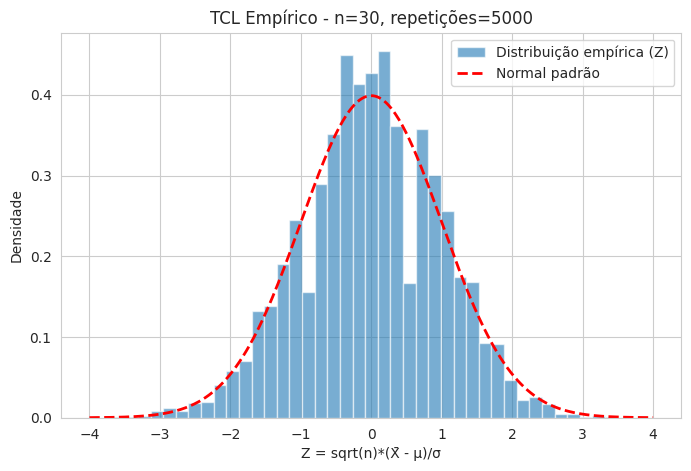

In [ ]:
from scipy.stats import norm
import numpy as np

coluna = 'NT_OBJ_FG'
populacao = data_filtered[coluna].dropna().values

sns.set_style("whitegrid")

plts.figure(figsize=(10, 6))
sns.histplot(populacao, kde=True, bins=30, alpha=0.7)

plts.title(f'Distribuição Original dos Dados da Coluna "{coluna}"', fontsize=16)
plts.xlabel('Valores da Coluna', fontsize=12)
plts.ylabel('Frequência / Densidade', fontsize=12)

plts.savefig('distribuicao_original.png')
plts.show()


coluna = 'NT_OBJ_FG'
n = 30
num_repeticoes = 5000

populacao = data_filtered[coluna].dropna().values

print(f"Tamanho da população considerada: {len(populacao)}")

mu_pop = np.mean(populacao)
sigma_pop = np.std(populacao, ddof=0)

medias_amostrais = []
for _ in range(num_repeticoes):
    amostra = np.random.choice(populacao, size=n, replace=True)
    medias_amostrais.append(np.mean(amostra))

medias_amostrais = np.array(medias_amostrais)

z_scores = np.sqrt(n) * (medias_amostrais - mu_pop) / sigma_pop

plts.figure(figsize=(8,5))
plts.hist(z_scores, bins=40, density=True, alpha=0.6, label='Distribuição empírica (Z)')

x = np.linspace(-4, 4, 500)
plts.plot(x, norm.pdf(x), 'r--', linewidth=2, label='Normal padrão')

plts.title(f'TCL Empírico - n={n}, repetições={num_repeticoes}')
plts.xlabel('Z = sqrt(n)*(X̄ - μ)/σ')
plts.ylabel('Densidade')
plts.legend()
plts.grid(True)
plts.show()

Apesar dos dados estarem irregulares no histograma, o teorema do limite central prova que 95% da população está próxima da média